#  Corona vaccine progress 
version 0.7 created by Magnus Sälgö [twitter](), [Linked in]()

* [this Notebook](https://github.com/salgo60/CoronaVaccinationCheck/blob/master/Check%20Corona%20Vaccination.ipynb) / [repository](https://github.com/salgo60/CoronaVaccinationCheck) 

* read the data from [github.com/owid/covid-19-data...vaccinations/country_data](https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations/country_data) and Wikidata
  * Data is reported cummulated for United Kingdom but also subnational data England, Scotland, Northern Ireland, Wales see [issue 228](https://github.com/owid/covid-19-data/issues/228)
     * subnational data have been published quite irregularly so far ==> we filter them out

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2020-12-29 08:15:03.804262


In [2]:
import pandas as pd
GITHUB_directory = "https://api.github.com/repos/owid/covid-19-data/contents/public/data/vaccinations/country_data"  
countries = pd.read_json(GITHUB_directory)  
listcountries = []
for index,row in countries.iterrows():
    df = pd.read_csv(row["download_url"])
    listcountries.append(df)
    
allCountries = pd.concat(listcountries, axis=0, ignore_index=True)    

In [3]:
# Show 15 latest sorted by dates
allCountries.sort_values(by=['date'],ascending=False)[0:15]

,location,date,vaccine,total_vaccinations,source_url
30,Hungary,2020-12-28,Pfizer/BioNTech,1094,https://kormany.hu/hirek/ujabb-helyszineken-fo...
39,Lithuania,2020-12-28,Pfizer/BioNTech,2270,https://sam.lrv.lt/en/news/lithuanian-healthca...
28,Estonia,2020-12-28,Pfizer/BioNTech,207,https://www.terviseamet.ee/et/uudised/covid-19...
5,Bahrain,2020-12-28,Sinopharm,55014,https://twitter.com/MOH_Bahrain/status/1343640...
56,United States,2020-12-28,"Moderna, Pfizer/BioNTech",2127143,https://covid.cdc.gov/covid-data-tracker/#vacc...
19,Canada,2020-12-28,Pfizer/BioNTech,58818,https://github.com/ishaberry/Covid19Canada/blo...
44,Portugal,2020-12-28,Pfizer/BioNTech,4828,https://twitter.com/SNS_Portugal/status/134361...
26,Denmark,2020-12-27,Pfizer/BioNTech,4788,https://files.ssi.dk/covid19/vaccinationstilsl...
23,Chile,2020-12-27,Pfizer/BioNTech,8638,https://deis.minsal.cl/
18,Canada,2020-12-27,Pfizer/BioNTech,52179,https://github.com/ishaberry/Covid19Canada/blo...


In [4]:
#Countries in list
allCountries["location"].value_counts()

Canada              14
Israel               8
Bahrain              6
United States        6
Chile                4
United Kingdom       2
Scotland             2
Russia               2
Mexico               2
Wales                2
Northern Ireland     2
China                1
Denmark              1
Lithuania            1
Germany              1
Costa Rica           1
Portugal             1
Estonia              1
Hungary              1
England              1
Name: location, dtype: int64

In [5]:
allCountries.groupby(["location", "vaccine"]).size()

location          vaccine                 
Bahrain           Sinopharm                    6
Canada            Pfizer/BioNTech             14
Chile             Pfizer/BioNTech              4
China             CNBG, Sinovac                1
Costa Rica        Pfizer/BioNTech              1
Denmark           Pfizer/BioNTech              1
England           Pfizer/BioNTech              1
Estonia           Pfizer/BioNTech              1
Germany           Pfizer/BioNTech              1
Hungary           Pfizer/BioNTech              1
Israel            Pfizer/BioNTech              8
Lithuania         Pfizer/BioNTech              1
Mexico            Pfizer/BioNTech              2
Northern Ireland  Pfizer/BioNTech              2
Portugal          Pfizer/BioNTech              1
Russia            Sputnik V                    2
Scotland          Pfizer/BioNTech              2
United Kingdom    Pfizer/BioNTech              2
United States     Moderna, Pfizer/BioNTech     3
                  Pfizer/B

In [6]:
allCountries['date'] = allCountries['date'].astype('datetime64[ns]')   

# Filter away Wales , England, Scotland see above and [issue 228](https://github.com/owid/covid-19-data/issues/228)
list_of_countries_to_delete = ["England","Northern Ireland","Scotland","Wales"]

allCountriesFiltered = allCountries[~allCountries["location"].isin(list_of_countries_to_delete)]
allCountriesFiltered.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 56
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   location            52 non-null     object        
 1   date                52 non-null     datetime64[ns]
 2   vaccine             52 non-null     object        
 3   total_vaccinations  52 non-null     int64         
 4   source_url          52 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.4+ KB


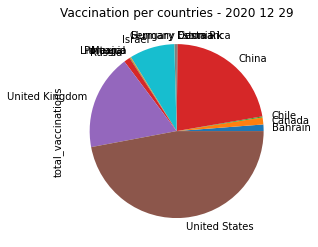

In [7]:
#Countries
%matplotlib inline    
import matplotlib.pyplot as plt   

#Reported numbers are accumulated --> get latest
plotCountries = allCountriesFiltered.sort_values(by=['date'],ascending=False) \
    [['total_vaccinations','location','vaccine']].groupby('location').apply(lambda x: x.head(1))
plotCountries = plotCountries.set_index('location')
plotCountries["total_vaccinations"].plot( y='location',kind = 'pie') 
plt.title("Vaccination per countries - " + start_time.strftime('%Y %m %d'))
plt.savefig('images/Corona_VaccinationperCountry.png')  
plt.show() 


In [8]:
plotCountries.sort_values(by='total_vaccinations',ascending=True)

,total_vaccinations,vaccine
location,,
Costa Rica,55,Pfizer/BioNTech
Estonia,207,Pfizer/BioNTech
Hungary,1094,Pfizer/BioNTech
Lithuania,2270,Pfizer/BioNTech
Denmark,4788,Pfizer/BioNTech
Portugal,4828,Pfizer/BioNTech
Mexico,6824,Pfizer/BioNTech
Chile,8638,Pfizer/BioNTech
Germany,21566,Pfizer/BioNTech


In [9]:
plotCountries.sum()

total_vaccinations                                              4521445
vaccine               SinopharmPfizer/BioNTechPfizer/BioNTechCNBG, S...
dtype: object

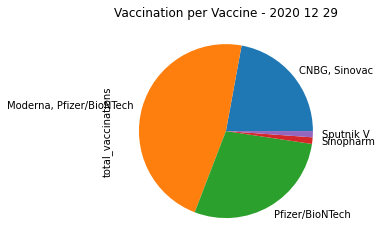

In [10]:
# Vaccine numbers
plotVaccine = plotCountries.groupby('vaccine')['total_vaccinations'].sum()
plotVaccine.plot( kind = 'pie') 
plt.title("Vaccination per Vaccine - " + start_time.strftime('%Y %m %d'))
plt.savefig('images/Corona_VaccinationperVaccine.png')  
plt.show()

In [11]:
plotVaccine.sort_values(ascending=True)

vaccine
Sputnik V                     52000
Sinopharm                     55014
CNBG, Sinovac               1000000
Pfizer/BioNTech             1287288
Moderna, Pfizer/BioNTech    2127143
Name: total_vaccinations, dtype: int64

In [12]:
# Sweden have 10 000 doses....
#allCountries

In [13]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2020-12-29 08:15:10.041338
Time elapsed (hh:mm:ss.ms) 0:00:06.238459


### Whole dataset
see 
* [COVID-19 Data Processing Pipelines and datasets](https://github.com/covid19-data/covid19-data)

### Compare population
* using data from Wikidata
* "translates" the labels to Wikidata Qnumber see reconciliationCountries_dict 

In [14]:
reconciliationCountries_dict = {
    "Bahrain" : "Q398", "Belarus" : "Q184","Canada" : "Q16",    "China" : "Q148",
    "Chile" : "Q298", "Costa Rica" : "Q800", "Denmark": "Q35",
    "Israel" : "Q801", "Mexico" : "Q96",
    "France" : "Q142","Germany" : "Q183",
    "Russia" : "Q159","United Kingdom" : "Q145", "United States" : "Q30",
    "Hungary": "Q28", "Estonia" : "Q191","Lithuania":"Q37","Portugal":"Q45"}
reconciliationCountries = pd.DataFrame.from_dict([reconciliationCountries_dict]).T
reconciliationCountries.columns = ["WD"]
reconciliationCountries.index.name = "Country"

In [15]:
import sys,json
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"
 
# https://w.wiki/sFn
queryWD = """SELECT DISTINCT ?cid  (SAMPLE(?continent) AS ?continent)  (SAMPLE(?memberEU) AS ?memberEU)  (SAMPLE(?democracy) AS ?democracy) ?country 
(REPLACE(STR(?cid), ".*Q", "Q") AS ?qid) ?population ?ISO3166_1 ?nominalGDPperCapita ?PPP_GDP_per_capita ?Human_Development_Index 
?G8 ?G20 ?IMF WHERE {
  ?cid wdt:P31 wd:Q3624078;
    wdt:P1082 ?population.
  OPTIONAL { ?cid wdt:P298 ?ISO3166_1. }
  OPTIONAL { ?cid wdt:P2132 ?nominalGDPperCapita. }
  OPTIONAL { ?cid wdt:P2299 ?PPP_GDP_per_capita. }
  OPTIONAL { ?cid wdt:P1081 ?Human_Development_Index. }
  BIND (exists{?cid wdt:P463 wd:Q458} AS ?memberEU)
  BIND (exists{?cid wdt:P463 wd:Q37143} AS ?G8)
  BIND (exists{?cid wdt:P463 wd:Q19771} AS ?G20)
  BIND (exists{?cid wdt:P463 wd:Q19771} AS ?IMF)
  BIND (exists{?cid wdt:P122/wdt:P279* wd:Q7174} AS ?democracy)
  {?cid wdt:P30 ?contid}
  OPTIONAL {
    ?contid rdfs:label ?continent.
    FILTER((LANG(?continent)) = "en")
    ?cid rdfs:label ?country.
    FILTER((LANG(?country)) = "en")
  }

SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
GROUP BY ?population ?countryLabel ?country ?ISO3166_1 ?nominalGDPperCapita ?PPP_GDP_per_capita ?Human_Development_Index ?cid  
?G8 ?G20 ?IMF"""


def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

WDpopulation = get_sparql_dataframe(endpoint_url, queryWD)
WDpopulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   cid                      194 non-null    object
 1   continent                194 non-null    object
 2   memberEU                 194 non-null    object
 3   democracy                194 non-null    object
 4   country                  194 non-null    object
 5   qid                      194 non-null    object
 6   population               194 non-null    object
 7   ISO3166_1                194 non-null    object
 8   nominalGDPperCapita      190 non-null    object
 9   PPP_GDP_per_capita       184 non-null    object
 10  Human_Development_Index  185 non-null    object
 11  G8                       194 non-null    object
 12  G20                      194 non-null    object
 13  IMF                      194 non-null    object
dtypes: object(14)
memory usage: 21.3+ KB


In [16]:
WDpopulation.sample(5)

,cid,continent,memberEU,democracy,country,qid,population,ISO3166_1,nominalGDPperCapita,PPP_GDP_per_capita,Human_Development_Index,G8,G20,IMF
49,http://www.wikidata.org/entity/Q874,Asia,false,true,Turkmenistan,Q874,5850901,TKM,6586,18030.95,0.706,false,false,false
178,http://www.wikidata.org/entity/Q778,North America,false,false,The Bahamas,Q778,395361,BHS,30762,30494.746,0.807,false,false,false
134,http://www.wikidata.org/entity/Q986,Africa,false,false,Eritrea,Q986,3497000,ERI,582,1510.459,0.44,false,false,false
52,http://www.wikidata.org/entity/Q40,Europe,true,true,Austria,Q40,8809212,AUT,44920,53879.298,0.885,false,false,false
185,http://www.wikidata.org/entity/Q691,Oceania,false,false,Papua New Guinea,Q691,8251162,PNG,2488,4207.707,0.544,false,false,false


In [17]:
plotCountries

,total_vaccinations,vaccine
location,,
Bahrain,55014,Sinopharm
Canada,58818,Pfizer/BioNTech
Chile,8638,Pfizer/BioNTech
China,1000000,"CNBG, Sinovac"
Costa Rica,55,Pfizer/BioNTech
Denmark,4788,Pfizer/BioNTech
Estonia,207,Pfizer/BioNTech
Germany,21566,Pfizer/BioNTech
Hungary,1094,Pfizer/BioNTech


In [18]:
plotCountriesPopulation = pd.merge(plotCountries, reconciliationCountries,how='outer', left_index=True, right_index=True,indicator=True)   
plotCountriesPopulation

,total_vaccinations,vaccine,WD,_merge
Bahrain,55014.0,Sinopharm,Q398,both
Belarus,NaN,NaN,Q184,right_only
Canada,58818.0,Pfizer/BioNTech,Q16,both
Chile,8638.0,Pfizer/BioNTech,Q298,both
China,1000000.0,"CNBG, Sinovac",Q148,both
Costa Rica,55.0,Pfizer/BioNTech,Q800,both
Denmark,4788.0,Pfizer/BioNTech,Q35,both
Estonia,207.0,Pfizer/BioNTech,Q191,both
France,NaN,NaN,Q142,right_only
Germany,21566.0,Pfizer/BioNTech,Q183,both


## New countries

In [19]:
#Missing
WDmissing = plotCountriesPopulation[plotCountriesPopulation["_merge"] == "left_only"].copy()
WDmissing

,total_vaccinations,vaccine,WD,_merge


In [20]:
del plotCountriesPopulation['_merge']


In [21]:
plotCountriesPopulation = pd.merge(plotCountries, reconciliationCountries,how='inner', left_index=True, right_index=True)  
#WDpopulation.sample(5)

In [22]:
CountriesData = pd.merge(plotCountriesPopulation, WDpopulation,how='inner', left_on='WD', right_on='qid',indicator=True)   
CountriesData = CountriesData.set_index('country')
CountriesData


,total_vaccinations,vaccine,WD,cid,continent,memberEU,democracy,qid,population,ISO3166_1,nominalGDPperCapita,PPP_GDP_per_capita,Human_Development_Index,G8,G20,IMF,_merge
country,,,,,,,,,,,,,,,,,
Bahrain,55014,Sinopharm,Q398,http://www.wikidata.org/entity/Q398,Asia,false,false,Q398,1492584,BHR,23739,47708.055,0.824,false,false,false,both
Canada,58818,Pfizer/BioNTech,Q16,http://www.wikidata.org/entity/Q16,North America,false,false,Q16,37894799,CAN,44870,46509.717,0.926,true,true,true,both
Chile,8638,Pfizer/BioNTech,Q298,http://www.wikidata.org/entity/Q298,South America,false,true,Q298,18054726,CHL,15346,24747.307,0.832,false,false,false,both
People's Republic of China,1000000,"CNBG, Sinovac",Q148,http://www.wikidata.org/entity/Q148,Asia,false,true,Q148,1409517397,CHN,8826,16842.408,0.752,false,true,true,both
Costa Rica,55,Pfizer/BioNTech,Q800,http://www.wikidata.org/entity/Q800,North America,false,false,Q800,4905769,CRI,11677,17109.751,0.794,false,false,false,both
Denmark,4788,Pfizer/BioNTech,Q35,http://www.wikidata.org/entity/Q35,Europe,true,false,Q35,5827463,DNK,57218,54356.448,0.929,false,false,false,both
Estonia,207,Pfizer/BioNTech,Q191,http://www.wikidata.org/entity/Q191,Europe,true,true,Q191,1324820,EST,20200,33447.828,0.861,false,false,false,both
Germany,21566,Pfizer/BioNTech,Q183,http://www.wikidata.org/entity/Q183,Europe,true,true,Q183,83149300,DEU,44665,52555.933,0.926,true,true,true,both
Hungary,1094,Pfizer/BioNTech,Q28,http://www.wikidata.org/entity/Q28,Europe,true,true,Q28,9769526,HUN,14278,28798.643,0.828,false,false,false,both


In [23]:
#del CountriesData['country']
#del CountriesData['qid']
#del CountriesData['_merge']

CountriesData['population'] = CountriesData['population'].astype(int)
CountriesData['nominalGDPperCapita'] = CountriesData['nominalGDPperCapita'].astype(int)
CountriesData['PPP_GDP_per_capita'] = CountriesData['PPP_GDP_per_capita'].astype(float)
CountriesData['Human_Development_Index'] = CountriesData['Human_Development_Index'].astype(float)
CountriesData["memberEU"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['memberEU'] = CountriesData['memberEU'].astype(int)
CountriesData["democracy"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData["democracy"] = CountriesData['democracy'].astype(int)
# G8 G20 IMF
CountriesData["G8"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['G8'] = CountriesData['G8'].astype(int)
CountriesData["G20"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['G20'] = CountriesData['G20'].astype(int)
CountriesData["IMF"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['IMF'] = CountriesData['IMF'].astype(int)

#"Correct United States of America
CountriesData["continent"].replace({"Oceania": "North America"}, inplace=True)
CountriesData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, Bahrain to United States of America
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   total_vaccinations       16 non-null     int64   
 1   vaccine                  16 non-null     object  
 2   WD                       16 non-null     object  
 3   cid                      16 non-null     object  
 4   continent                16 non-null     object  
 5   memberEU                 16 non-null     int64   
 6   democracy                16 non-null     int64   
 7   qid                      16 non-null     object  
 8   population               16 non-null     int64   
 9   ISO3166_1                16 non-null     object  
 10  nominalGDPperCapita      16 non-null     int64   
 11  PPP_GDP_per_capita       16 non-null     float64 
 12  Human_Development_Index  16 non-null     float64 
 13  G8                       16 non-null     int

In [24]:
#CountriesData

In [25]:
CountriesData['Country'] = CountriesData.index

In [26]:
CountriesData["vaccinations_population_percent"] = CountriesData["total_vaccinations"]/CountriesData["population"] * 100

correlations = CountriesData.corr()  
correlations["total_vaccinations"]

total_vaccinations                 1.000000
memberEU                          -0.256667
democracy                          0.118751
population                         0.506560
nominalGDPperCapita                0.429928
PPP_GDP_per_capita                 0.340956
Human_Development_Index            0.216842
G8                                 0.395594
G20                                0.468765
IMF                                0.468765
vaccinations_population_percent    0.113248
Name: total_vaccinations, dtype: float64

In [27]:
correlations["vaccinations_population_percent"]

total_vaccinations                 0.113248
memberEU                          -0.297751
democracy                         -0.202555
population                        -0.145151
nominalGDPperCapita                0.226001
PPP_GDP_per_capita                 0.300151
Human_Development_Index            0.178866
G8                                -0.119768
G20                               -0.230919
IMF                               -0.230919
vaccinations_population_percent    1.000000
Name: vaccinations_population_percent, dtype: float64

In [28]:
# see https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
import seaborn as sns
#plt.rcParams['figure.figsize'] = (8.0, 8.0)
#heatmap = sns.heatmap(correlations, vmin=-1, vmax=1, annot=True)
#heatmap.set_title('Corona vaccinations Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


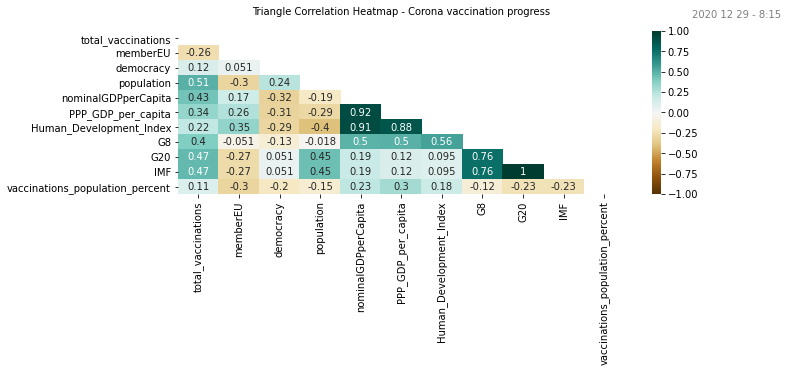

In [29]:
import numpy as np
plt.figure(figsize=(10, 3))
np.triu(np.ones_like(correlations))
mask = np.triu(np.ones_like(correlations, dtype=np.bool))
heatmap = sns.heatmap(correlations, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap - Corona vaccination progress', fontdict={'fontsize':10},y=0.9, pad=16);
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M'), fontsize=10,color = 'gray',x=0.9)
plt.savefig('images/Correlation_heatmap.png', dpi=300, bbox_inches='tight')

In [30]:
CountriesData = CountriesData.sort_values(by=['vaccinations_population_percent'],ascending=False)
CountriesData[{"total_vaccinations","population","vaccinations_population_percent","continent",
               "memberEU","G8","G20","IMF"}]

,total_vaccinations,G8,IMF,population,G20,continent,vaccinations_population_percent,memberEU
country,,,,,,,,
Israel,378200,0,0,9093000,0,Asia,4.159243,0
Bahrain,55014,0,0,1492584,0,Asia,3.685823,0
United Kingdom,800000,1,1,66022273,1,Europe,1.211712,1
United States of America,2127143,1,1,328239523,1,North America,0.648046,0
Canada,58818,1,1,37894799,1,North America,0.155214,0
Denmark,4788,0,0,5827463,0,Europe,0.082163,1
Lithuania,2270,0,0,2790842,0,Europe,0.081337,1
People's Republic of China,1000000,0,1,1409517397,1,Asia,0.070946,0
Chile,8638,0,0,18054726,0,South America,0.047843,0


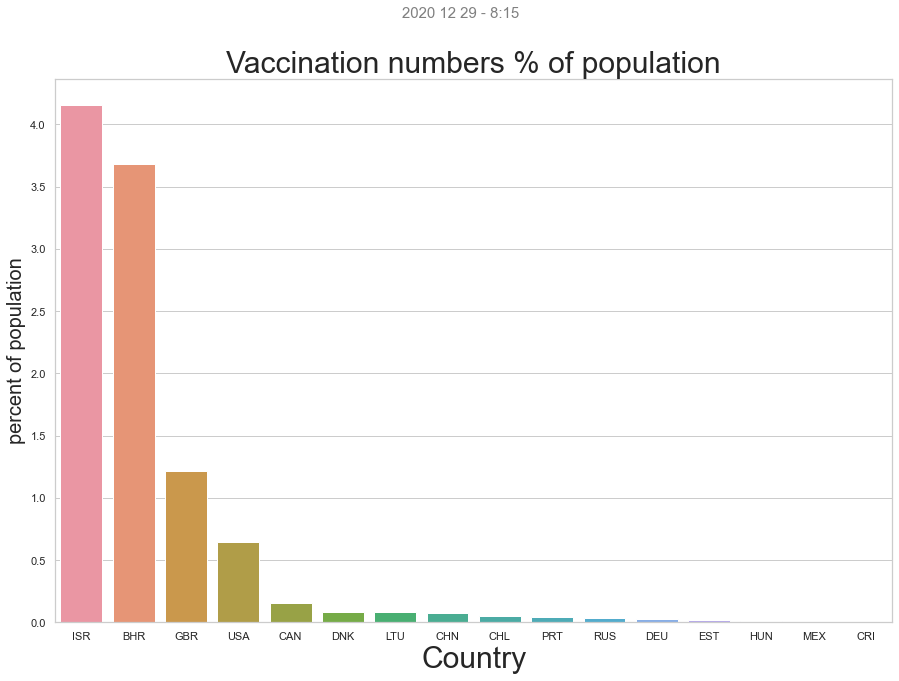

In [31]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData). \
            set_title("Vaccination numbers % of population", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Country",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M'), fontsize=15,color = 'gray')
plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_2.png",bbox_inches="tight")

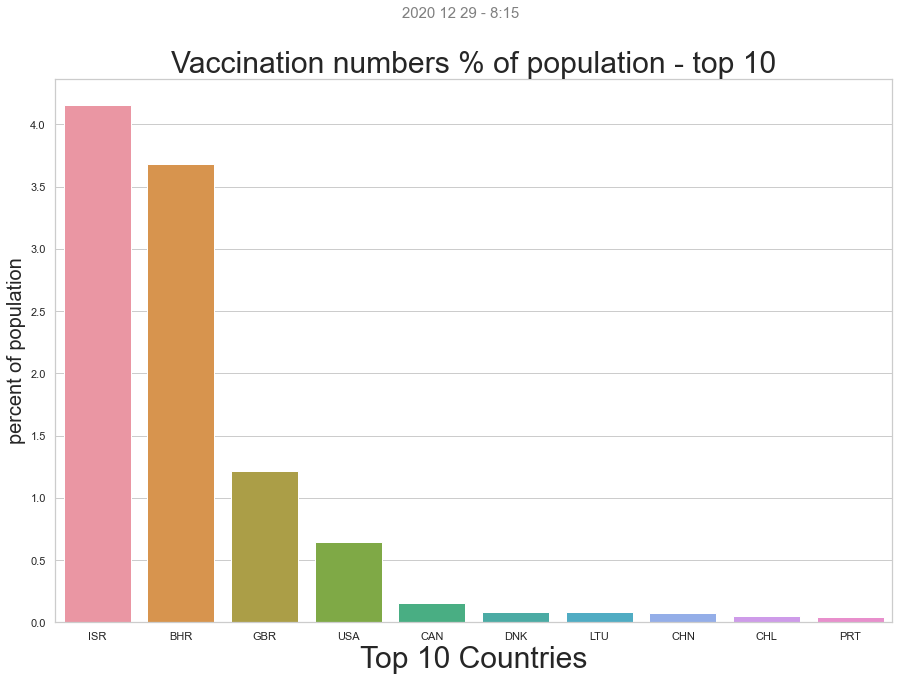

In [32]:
#Top 10 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData[0:10]). \
            set_title("Vaccination numbers % of population - top 10", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Top 10 Countries",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M'), fontsize=15,color = 'gray')
plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_1_10.png",bbox_inches="tight")

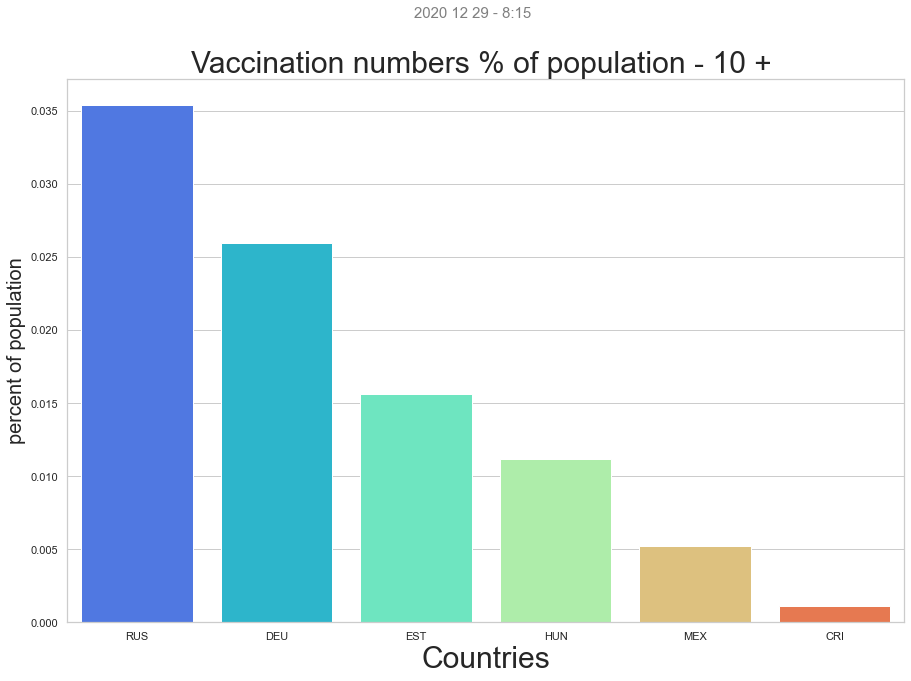

In [33]:
# 10-
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData[10:]). \
            set_title("Vaccination numbers % of population - 10 + ", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Countries",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M'), fontsize=15,color = 'gray')
plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_10_.png",bbox_inches="tight")

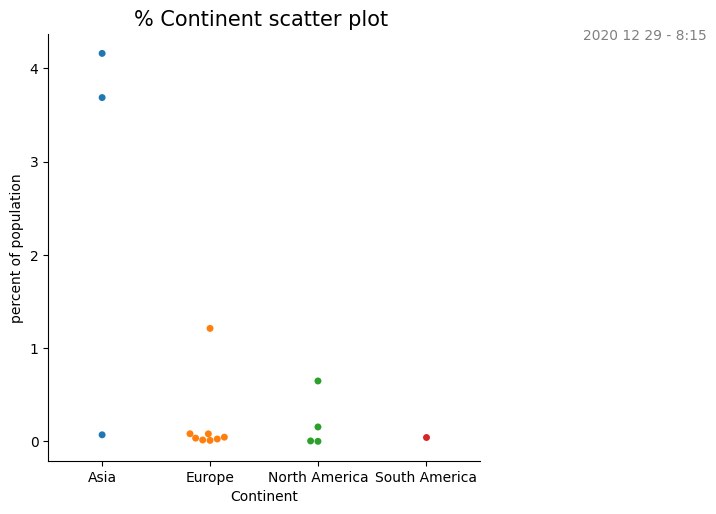

In [34]:
#https://seaborn.pydata.org/tutorial/categorical.html
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="continent", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% Continent scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Continent",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M'), x=1.3, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_Categorical_scatterplot.png",bbox_inches="tight")


In [35]:
CountriesData["Member EU"] = CountriesData["memberEU"]
CountriesData["Member EU"] = CountriesData["Member EU"].astype(str)
CountriesData["Member EU"].replace({"1": "Member in EU", "0": "non Member"}, inplace=True)

#CountriesData

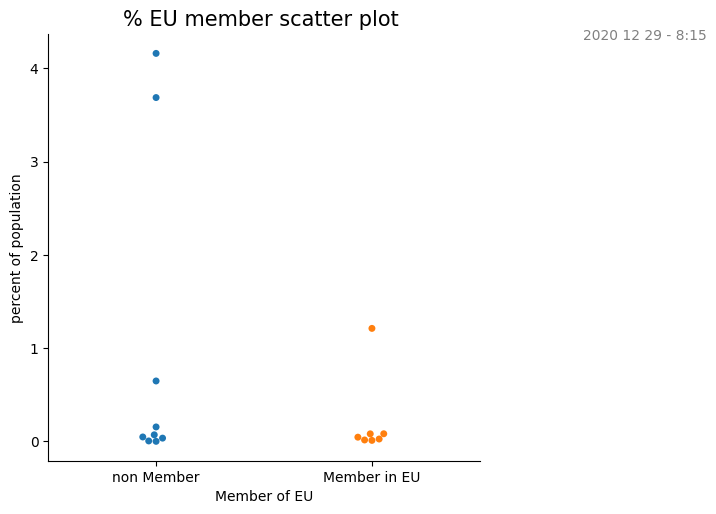

In [36]:

plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member EU", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% EU member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of EU",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M'), x=1.3, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_EUCategorical_scatterplot.png",bbox_inches="tight")


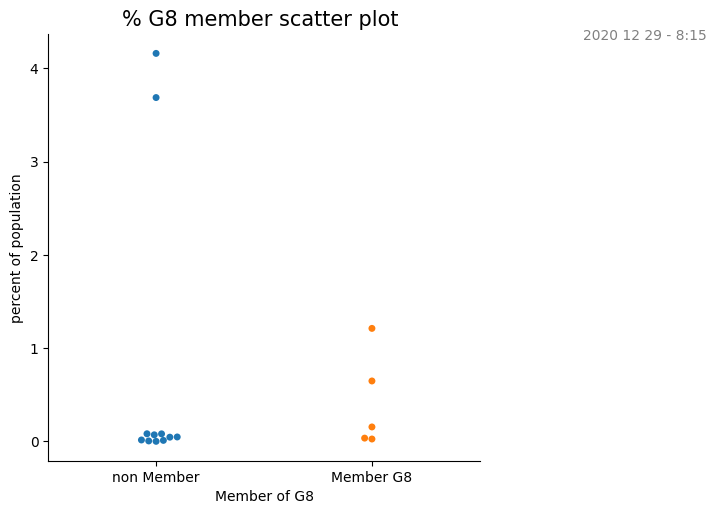

In [37]:
CountriesData["Member G8"] = CountriesData["G8"]
CountriesData["Member G8"] = CountriesData["G8"].astype(str)
CountriesData["Member G8"].replace({"1": "Member G8", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member G8", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% G8 member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of G8",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M'), x=1.3, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_G8_Categorical_scatterplot.png",bbox_inches="tight")


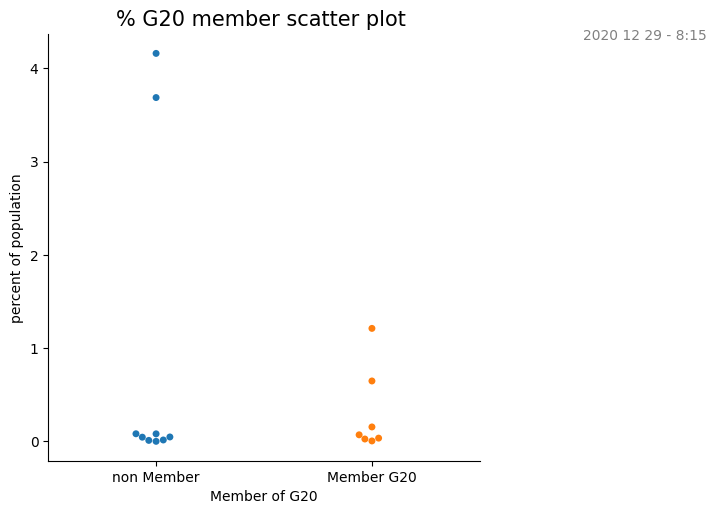

In [38]:
CountriesData["Member G20"] = CountriesData["G20"]
CountriesData["Member G20"] = CountriesData["G20"].astype(str)
CountriesData["Member G20"].replace({"1": "Member G20", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member G20", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% G20 member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of G20",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M'), x=1.3, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_G20_Categorical_scatterplot.png",bbox_inches="tight")


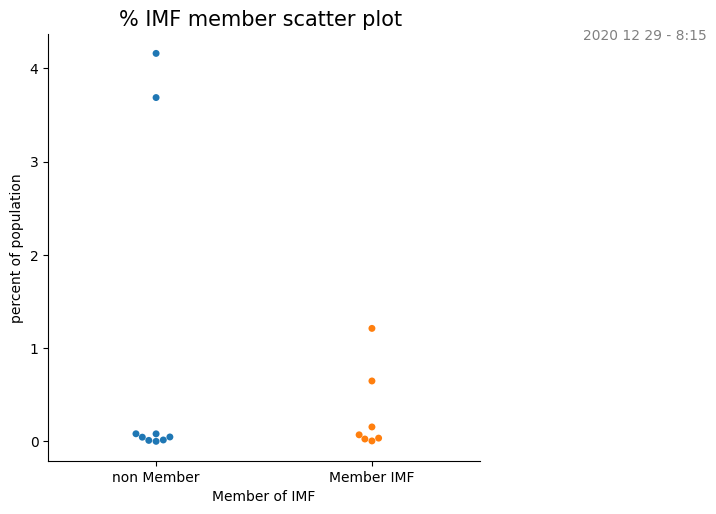

In [39]:
CountriesData["Member IMF"] = CountriesData["IMF"]
CountriesData["Member IMF"] = CountriesData["IMF"].astype(str)
CountriesData["Member IMF"].replace({"1": "Member IMF", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member IMF", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% IMF member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of IMF",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M'),  x=1.3, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_IMF_Categorical_scatterplot.png",bbox_inches="tight")
